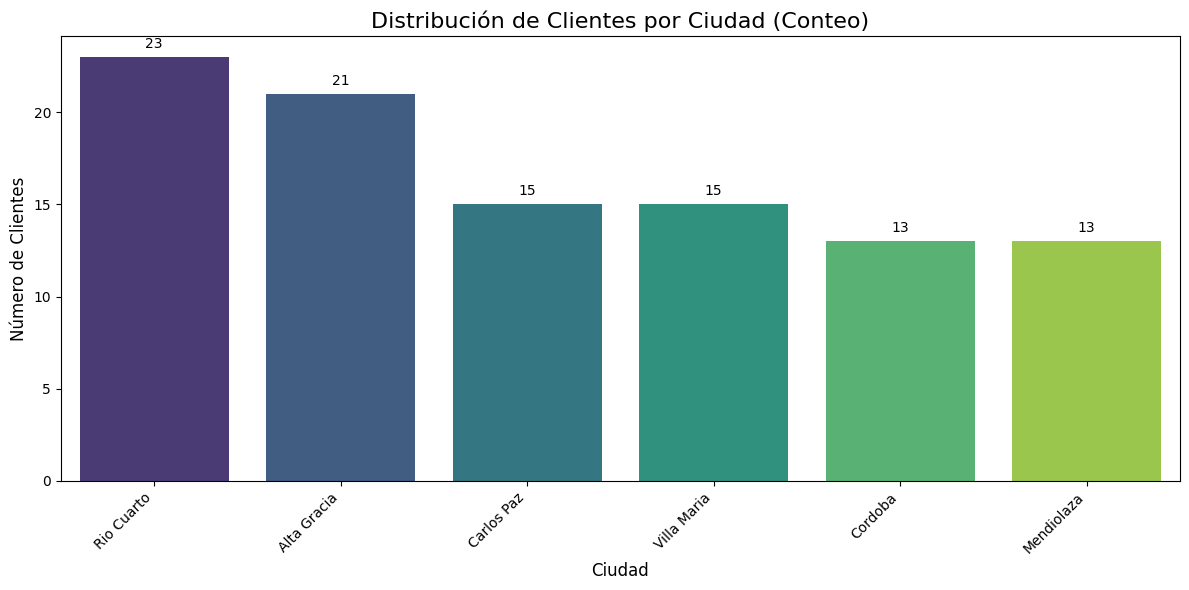

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# archivo .xlsx
df = pd.read_excel('Assets/clientes.xlsx')
conteo_clientes_por_ciudad = df['ciudad'].value_counts()

plt.figure(figsize=(12, 6))

# Crea el gráfico de barras.
# x=Ciudades (índice de la Serie) y y=Conteo (valores de la Serie)
sns.barplot(x=conteo_clientes_por_ciudad.index, 
            y=conteo_clientes_por_ciudad.values,
            hue=conteo_clientes_por_ciudad.index, # AÑADIR esta línea
            palette="viridis",
            legend=False) # AÑADIR esta línea

plt.title('Distribución de Clientes por Ciudad (Conteo)', fontsize=16)
plt.xlabel('Ciudad', fontsize=12)
plt.ylabel('Número de Clientes', fontsize=12)

# Rotar las etiquetas del eje X para mejor lectura
plt.xticks(rotation=45, ha='right') 

# Añadir los valores exactos sobre cada barra (anotaciones)
for index, value in enumerate(conteo_clientes_por_ciudad.values):
    plt.text(index, value + 0.5, str(value), ha='center')

plt.tight_layout() # Ajusta el diseño para evitar cortar etiquetas
plt.show()

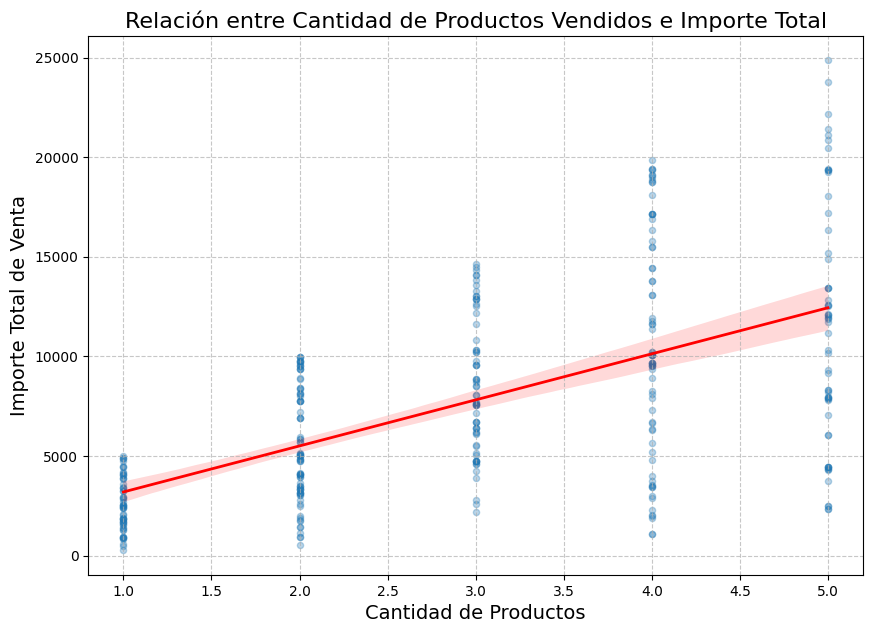

In [ ]:
df = pd.read_excel('Assets/detalle_ventas.xlsx')

plt.figure(figsize=(10, 7))

# un gráfico de dispersión con una línea de regresión lineal
# La línea de regresión ayuda a visualizar la tendencia y la fuerza de la relación
sns.regplot(x='cantidad', y='importe', data=df,
            scatter_kws={'alpha':0.3, 's':20}, # Estilo de los puntos de dispersión
            line_kws={'color':'red', 'linewidth':2}) # Estilo de la línea de regresión

plt.title('Relación entre Cantidad de Productos Vendidos e Importe Total', fontsize=16)
plt.xlabel('Cantidad de Productos', fontsize=14)
plt.ylabel('Importe Total de Venta', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

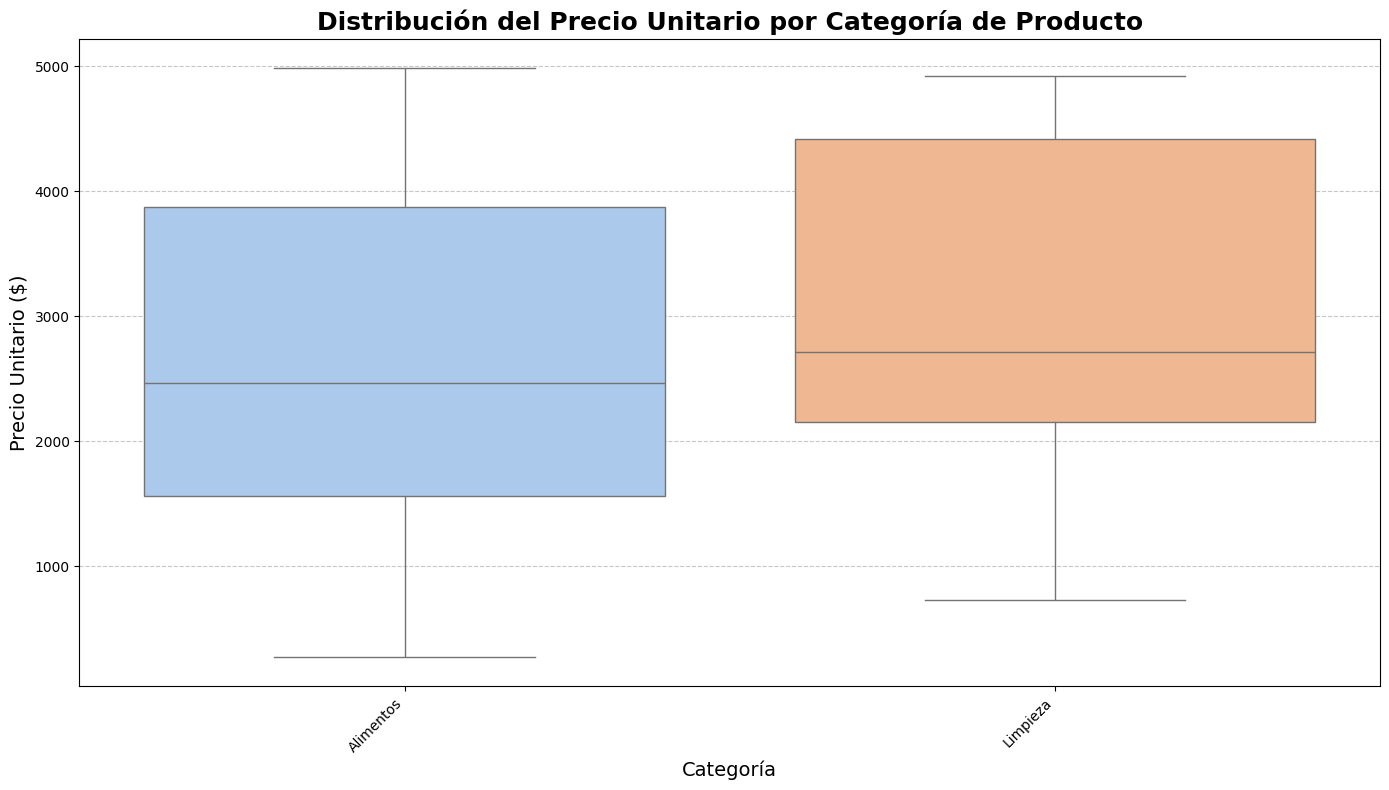

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# archivo .xlsx
df_productos = pd.read_excel("Assets/productos_corregidos.xlsx")

plt.figure(figsize=(14, 8))

# Crea el Box Plot usando Seaborn
sns.boxplot(
    x='categoria',
    y='precio_unitario',
    data=df_productos,
    palette="pastel",
    hue='categoria', # Para asegurar colores distintos
    legend=False
)

plt.title('Distribución del Precio Unitario por Categoría de Producto', fontsize=18, fontweight='bold')
plt.xlabel('Categoría', fontsize=14)
plt.ylabel('Precio Unitario ($)', fontsize=14)

# Rota las etiquetas del eje X para mejor legibilidad si hay muchas categorías
plt.xticks(rotation=45, ha='right') 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [1]:
# =================================================================
# programa.py: Integración de Análisis y KPIs de la Tienda Aurelion
# =================================================================

import pandas as pd
import numpy as np

# --- 1. SIMULACIÓN DE DATOS (Representa la fuente que Power BI usa) ---

# Crear datos simulados para ilustrar las métricas clave
np.random.seed(42)
num_ventas = 500
fechas = pd.to_datetime('2024-01-01') + pd.to_timedelta(np.random.randint(0, 300, num_ventas), unit='D')
clientes = np.random.randint(1, 100, num_ventas) # 99 clientes
importe = np.random.uniform(1000, 5000, num_ventas)
cantidad = np.random.randint(1, 5, num_ventas)
ciudades = np.random.choice(['Caracas', 'Valencia', 'Maracaibo', 'Cordoba'], num_ventas)
categorias = np.random.choice(['Alimentos', 'Limpieza', 'Electronica'], num_ventas)
medios_pago = np.random.choice(['Efectivo', 'Tarjeta', 'QR'], num_ventas, p=[0.5, 0.3, 0.2])

df_ventas = pd.DataFrame({
    'fecha': fechas,
    'id_cliente': clientes,
    'id_venta': np.arange(1000, 1000 + num_ventas),
    'importe': importe,
    'cantidad': cantidad,
    'ciudad': ciudades,
    'categoria': categorias,
    'medio_pago': medios_pago
})

# --- 2. CÁLCULO DE MÉTRICAS CLAVE (Simulando DAX en Python) ---

print("=" * 60)
print("             ANÁLISIS DE RENDIMIENTO - TIENDA AURELION")
print("=" * 60)

# 2.1. Métricas Financieras Básicas
ventas_totales = df_ventas['importe'].sum()
print(f"💰 Ventas Totales: ${ventas_totales:,.2f}")

# 2.2. KPI 2: Frecuencia de Compra vs. Meta (Actividad)
conteo_transacciones = df_ventas['id_venta'].nunique()
meta_frecuencia = 100
print("\n--- KPI 2: Frecuencia de Compra ---")
print(f"Total de Transacciones Únicas: {conteo_transacciones}")
print(f"Meta (Mensual Asumida): {meta_frecuencia}")
print(f"Estado: {'CUMPLIDO' if conteo_transacciones >= meta_frecuencia else 'PENDIENTE'}")

# 2.3. KPI 3: Rendimiento de Precio Promedio
precio_promedio_unidad = ventas_totales / df_ventas['cantidad'].sum()
umbral_precio_promedio = 3000
print("\n--- KPI 3: Rendimiento de Precio Promedio ---")
print(f"Precio Promedio x Unidad: ${precio_promedio_unidad:,.2f}")
print(f"Umbral Deseado: ${umbral_precio_promedio:,.2f}")
print(f"Estado: {'SOBRE EL UMBRAL' if precio_promedio_unidad >= umbral_precio_promedio else 'BAJO EL UMBRAL'}")

# 2.4. KPI de Lealtad: % Clientes Recurrentes (Simulando la lógica DAX avanzada)
clientes_activos = df_ventas['id_cliente'].nunique()

# Crea una tabla con el conteo de transacciones por cliente
transacciones_por_cliente = df_ventas.groupby('id_cliente')['id_venta'].nunique().reset_index(name='NumTransacciones')

# Filtra clientes recurrentes (> 1 transacción)
clientes_recurrentes = transacciones_por_cliente[transacciones_por_cliente['NumTransacciones'] > 1]['id_cliente'].nunique()

porc_recurrencia = clientes_recurrentes / clientes_activos
meta_recurrencia = 0.30

print("\n--- KPI de Lealtad: % Clientes Recurrentes ---")
print(f"Clientes Activos Totales: {clientes_activos}")
print(f"Clientes Recurrentes (>1 compra): {clientes_recurrentes}")
print(f"Porcentaje de Recurrencia: {porc_recurrencia:.2%}")
print(f"Meta de Retención (30%): {meta_recurrencia:.2%}")

# --- 3. ANÁLISIS CLAVE DE SEGMENTACIÓN (Simulando Visualizaciones) ---

print("\n" + "=" * 60)
print("             CONCLUSIONES CLAVE POR SEGMENTO")
print("=" * 60)

# 3.1. Concentración de Clientes por Ciudad (Gráfico de Barras)
conteo_clientes_ciudad = df_ventas.drop_duplicates(subset=['id_cliente', 'ciudad']).groupby('ciudad')['id_cliente'].count().sort_values(ascending=False)
print("\n🏙️ Concentración de Clientes por Ciudad:")
print(conteo_clientes_ciudad.to_string())

# 3.2. Evolución del Medio de Pago (Gráfico de Área Apilada 100%)
# Muestra la proporción actual de ingresos por medio de pago
ingreso_por_pago = df_ventas.groupby('medio_pago')['importe'].sum().sort_values(ascending=False)
total_ingreso = ingreso_por_pago.sum()
proporcion_pago = (ingreso_por_pago / total_ingreso) * 100

print("\n💳 Composición Actual por Medio de Pago (% del Ingreso Total):")
print(proporcion_pago.map('{:.2f}%'.format).to_string())
print("\nAnálisis: Se debe monitorear el crecimiento de Tarjeta/QR para gestionar costos de comisión.")

# 3.3. Diagnóstico de Outliers (Gráfico de Dispersión/Regresión)
# Muestra las transacciones con el importe más alto para detectar Outliers

outliers_importe = df_ventas.nlargest(5, 'importe')[['id_venta', 'importe', 'cantidad', 'ciudad', 'categoria']]

print("\n🚨 Top 5 Transacciones Outliers (Mayor Importe):")
print("---------------------------------------------")
print(outliers_importe.to_string(index=False))
print("\nDiagnóstico: Estos valores atípicos son cruciales para validar la precisión del Modelo de Regresión Lineal.")

print("\n" + "=" * 60)
print("El análisis completo está disponible en el informe Power BI.")
print("=" * 60)

             ANÁLISIS DE RENDIMIENTO - TIENDA AURELION
💰 Ventas Totales: $1,518,936.63

--- KPI 2: Frecuencia de Compra ---
Total de Transacciones Únicas: 500
Meta (Mensual Asumida): 100
Estado: CUMPLIDO

--- KPI 3: Rendimiento de Precio Promedio ---
Precio Promedio x Unidad: $1,242.99
Umbral Deseado: $3,000.00
Estado: BAJO EL UMBRAL

--- KPI de Lealtad: % Clientes Recurrentes ---
Clientes Activos Totales: 99
Clientes Recurrentes (>1 compra): 96
Porcentaje de Recurrencia: 96.97%
Meta de Retención (30%): 30.00%

             CONCLUSIONES CLAVE POR SEGMENTO

🏙️ Concentración de Clientes por Ciudad:
ciudad
Valencia     74
Cordoba      72
Maracaibo    72
Caracas      65

💳 Composición Actual por Medio de Pago (% del Ingreso Total):
medio_pago
Efectivo    48.06%
Tarjeta     30.20%
QR          21.74%

Análisis: Se debe monitorear el crecimiento de Tarjeta/QR para gestionar costos de comisión.

🚨 Top 5 Transacciones Outliers (Mayor Importe):
---------------------------------------------
 id_v